<a href="https://colab.research.google.com/github/mohan844/corona_tweet_sentiment_analysis/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: CoronaVirus Tweet Sentiment Analysis** 



##### **Project Type**    - **Classification**
##### **Contribution**    - **Individual**
##### **Team Member -** **LALIT MOHAN**

# **Project Summary -**

**The problem at hand is to classify tweets related to the Corona Virus into different sentiment categories, such as positive, negative, or neutral, using machine learning algorithms. Two popular algorithms for classification are logistic regression and Naive Bayes, and the performance of each algorithm will be evaluated based on metrics such as accuracy, precision, recall, and auc-roc score.**

**To preprocess the text data, CountVectorizer and TF-IDF Vectorizer can be used to convert the tweets into a numeric format that can be easily used for training the classification models. CountVectorizer counts the frequency of each word in a document, while TF-IDF Vectorizer considers the frequency of the word across all documents.**

**By applying these vectorization techniques to preprocess the tweets, the text data can be converted into a numeric format that can be easily used for training the classification models. The performance of each algorithm using these vectorization techniques will be evaluated to determine which algorithm and vectorization technique works best for classifying Corona Virus Tweet Sentiments.**

# **GitHub Link -**

https://github.com/mohan844/corona_tweet_sentiment_analysis.git

# **Problem Statement**

**The problem at hand is to classify tweets related to the Corona Virus into different sentiment categories using machine learning algorithms such as logistic regression and Naive Bayes. The objective is to accurately predict the sentiment of new, unlabeled tweets by training the models on a labeled dataset of tweets. The performance of each algorithm will be evaluated based on metrics such as accuracy, precision, recall, and roc-auc. To preprocess the tweets, CountVectorizer and TF-IDF Vectorizer will be used to convert the text data into a numeric format that can be easily used for training the models. The ultimate goal is to determine the best algorithm and vectorization technique for accurately classifying Corona Virus Tweet Sentiments.**

In [ ]:
# Import some library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Load the dataset:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Machine Learning/Capstone_Project: 3 Classification/Coronavirus Tweets.csv', encoding='latin-1')

In [ ]:
# Head into the data:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df['OriginalTweet'][0:10]

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

In [ ]:
df.shape

(41157, 6)

**This Dataset has 5 independent variable and 1 Dependent Variable. For the model evaluation we are going to use only 'OriginalTweet' column as independent and sentiment as dependent Variable.**

In [ ]:
# Check info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Unique value in each columns:
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

**From info() and nunique() we conclude that original tweet and sentiment has equal number rows 41157 . NO null values**

##EDA & Basic Feature Engineering:

In [ ]:
# Creating column for measure the tweet length:
df['length']=df['OriginalTweet'].apply(len)

Text(0, 0.5, 'Frequency')

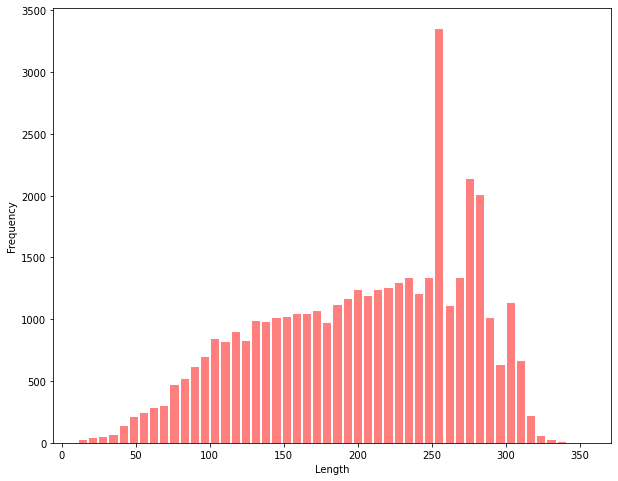

In [ ]:
df['length'].plot(bins=50,kind='hist',color='red', alpha=0.5, rwidth=0.8,figsize=(10,8))
plt.xlabel('Length')
plt.ylabel('Frequency')

In [ ]:
# Total unique sentiments in sentiment column:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
# Creating a new column for sentiments of positive, Negative & Neutral:
df['new_sentiment'] = df['Sentiment'].replace(to_replace = ['Neutral','Positive','Extremely Negative','Negative','Extremely Positive'], value = ['Neutral','Positive','Negative','Negative','Positive'])

Text(0, 0.5, 'Tweet counts')

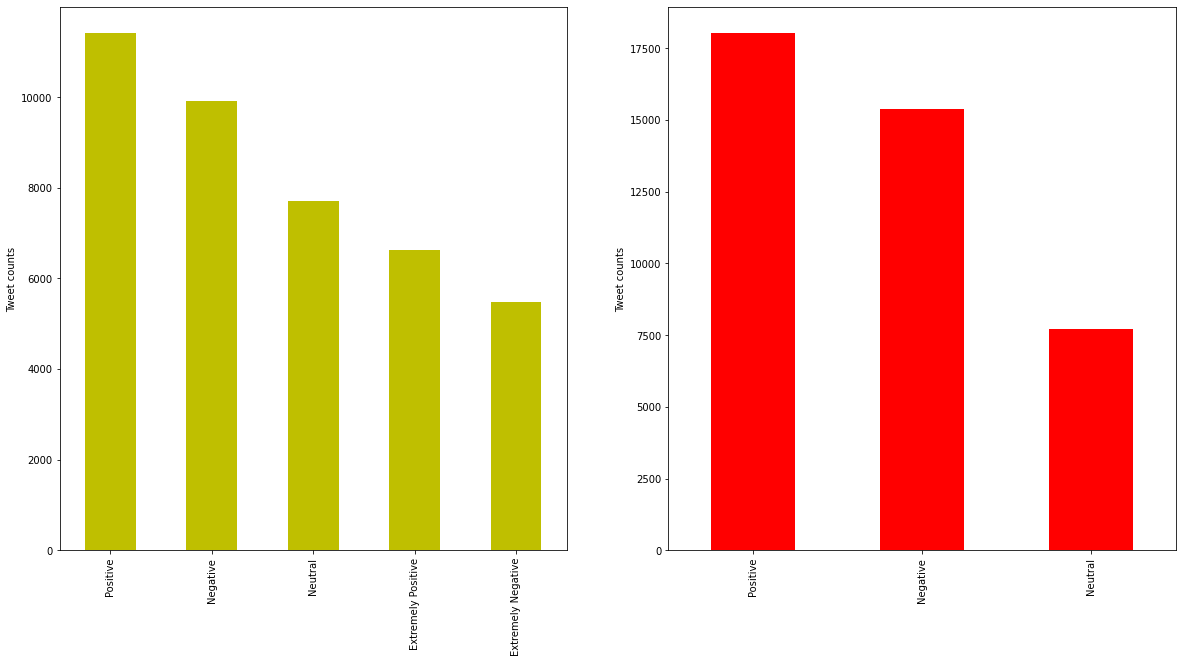

In [ ]:
# Plotting the all two graph of sentiments:
fig,axis = plt.subplots(1,2,figsize=(20,10))
df['Sentiment'].value_counts().plot(kind='bar', ax=axis[0], color='y')
df['new_sentiment'].value_counts().plot(kind='bar',ax=axis[1], color='r')
axis[0].set_ylabel('Tweet counts')
axis[1].set_ylabel('Tweet counts')

**From the graph we concluse that out of total data Positive reviews are 40%, negative reviews are 37% and Neutral Reviews are 23%.**

In [ ]:
# Converting the Date into proper format and adding month and week columns:
from datetime import datetime
df['TweetAt'] = df['TweetAt'].apply(lambda z: datetime.strptime(z,'%d-%m-%Y'))
df['week'] = df['TweetAt'].apply(lambda z:z.strftime("%A"))
df['month'] = df['TweetAt'].apply(lambda z:z.strftime("%B"))

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length,new_sentiment,week,month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,Neutral,Monday,March
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237,Positive,Monday,March
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131,Positive,Monday,March
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,306,Positive,Monday,March
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,Negative,Monday,March


Text(0, 0.5, 'Mean Length')

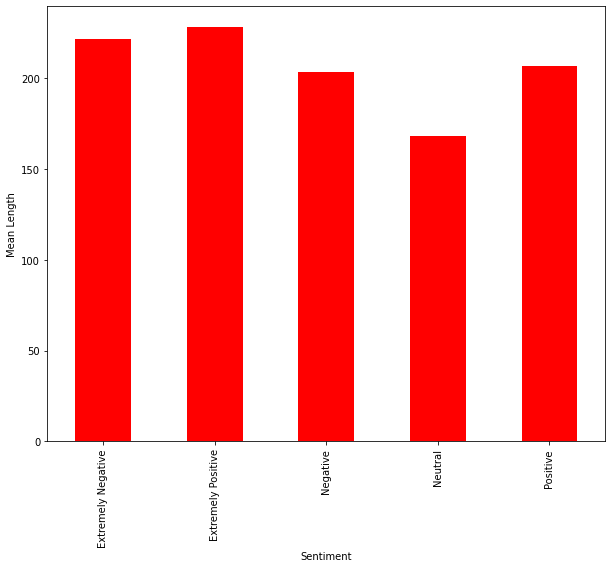

In [ ]:
# Checking variation of sentiments with respect to tweet length:
df.groupby(['Sentiment'])['length'].mean().plot(kind='bar',figsize=(10,8),color='r')
plt.ylabel('Mean Length')

**conclusion:**

1.   **Extreamly rated sentiments have greater in length than the non extrem.**
2.   **Extreamly positive rated sentiments have greater in length than others.** 
3.   **On the other hand neutral sentiments have low in characters.**






In [ ]:
# Extracting the Min & Max time from dataset:
max_time = df['TweetAt'].max()
min_time = df['TweetAt'].min()
print('Maximum time:', max_time)
print('Minimum time:', min_time)

Maximum time: 2020-04-14 00:00:00
Minimum time: 2020-03-16 00:00:00


In [ ]:
print('Total days of data:', max_time- min_time)

Total days of data: 29 days 00:00:00


**We have the data from 16th of march, 2020 to 14th of April, 2020 i.e 29 Days of Data.**

## Relation between dates and Tweets:








Text(0, 0.5, 'Frequency')

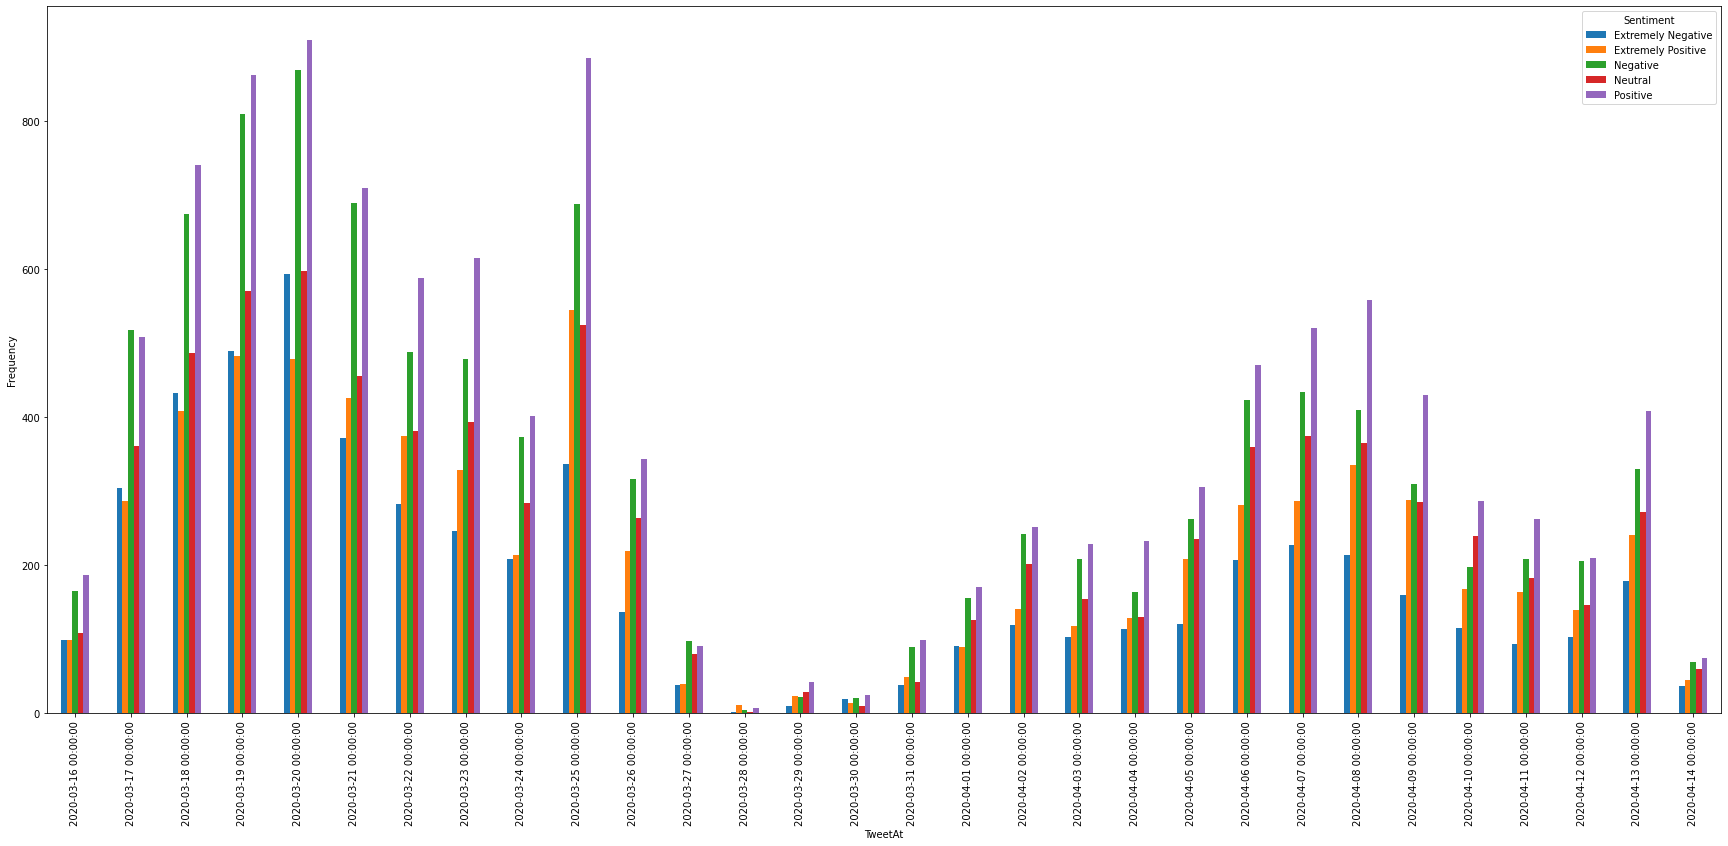

In [ ]:
df.groupby(['TweetAt','Sentiment'])['UserName'].count().unstack().plot(kind='bar',figsize=(30,13))
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

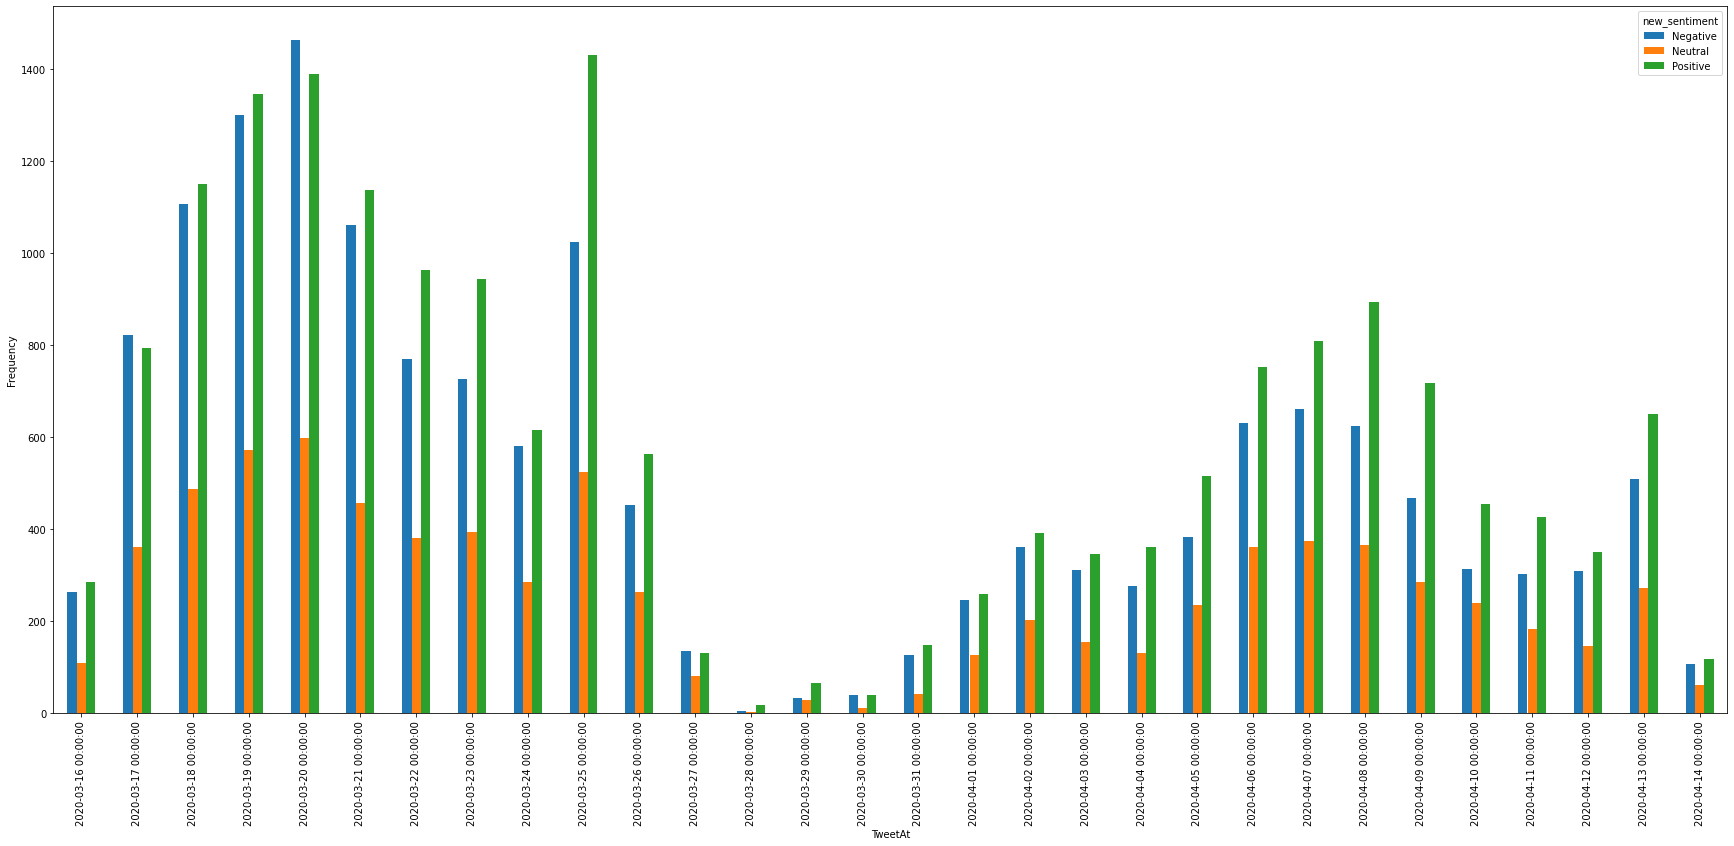

In [ ]:
df.groupby(['TweetAt','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',figsize=(30,13))
plt.ylabel('Frequency')

**We conclude that:**

*   Majority of days are ratted as positive. Except the date 2020-03-20 and 2020-03-20.
*   We noted that at end of March no of Tweets are getting decreased, on otherhand beginning of April it goes on increased.

*   Density of Tweets in March are High as compared to April, which may be people are getting used to COVID-19.
  





## Relation between Week, Tweets and Sentiments:

<Axes: xlabel='week'>

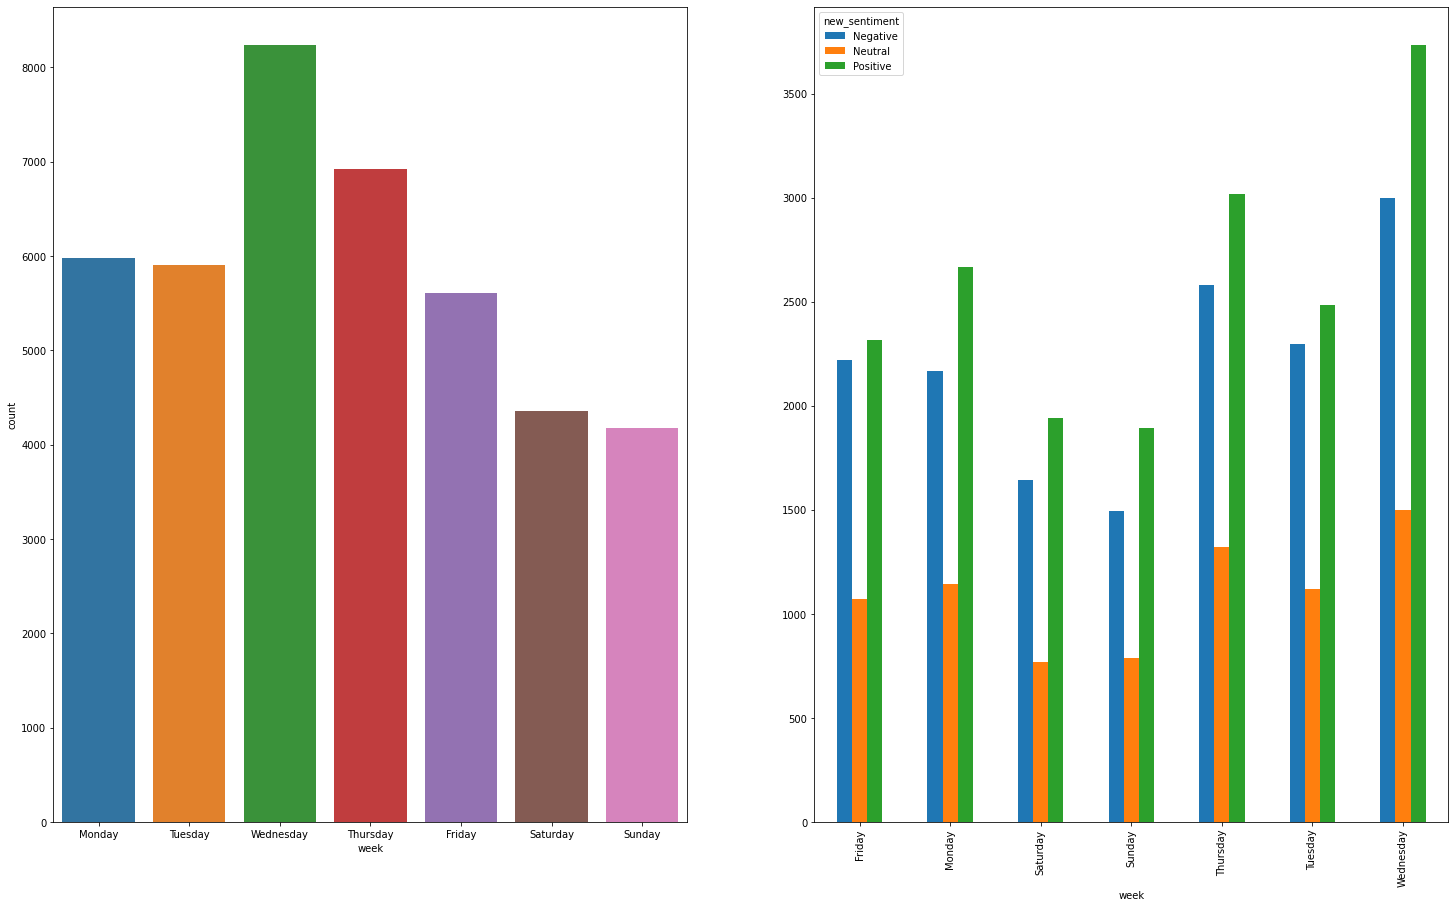

In [ ]:
# Plotting the count plots:
fig,axis = plt.subplots(1,2,figsize=(25,15))
sns.countplot(data=df,x=df['week'],ax=axis[0])
df.groupby(['week','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',ax=axis[1])

new_sentiment       week  Negative  Neutral  Positive  neg_ratio
0                 Friday      2221     1070      2317       0.40
1                 Monday      2165     1143      2667       0.36
2               Saturday      1643      769      1940       0.38
3                 Sunday      1492      790      1891       0.36
4               Thursday      2580     1320      3017       0.37
5                Tuesday      2297     1121      2482       0.39
6              Wednesday      3000     1500      3732       0.36


<Axes: xlabel='week', ylabel='neg_ratio'>

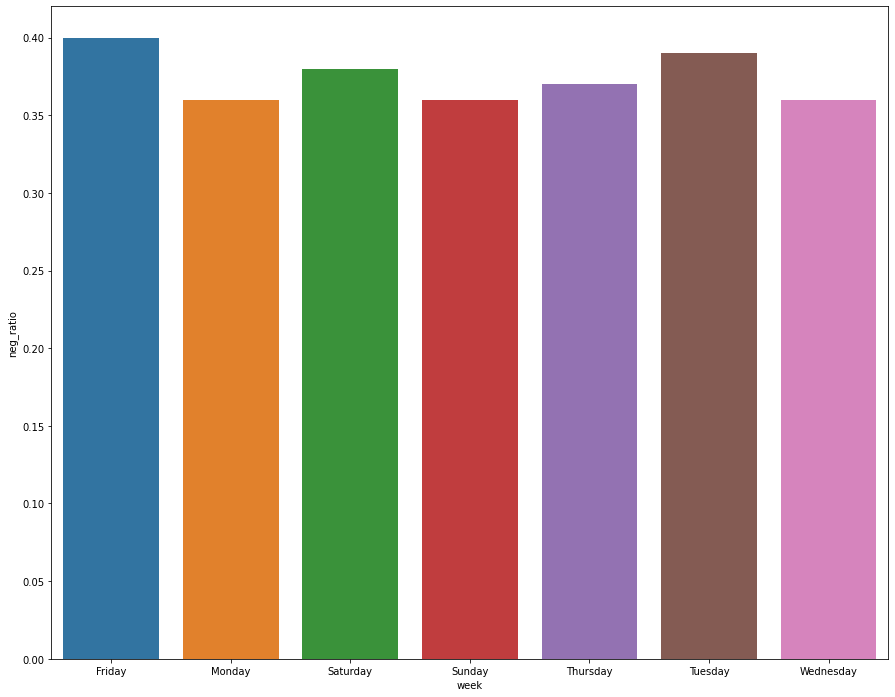

In [ ]:
# Plotting the graph for ratio of negative tweets to total tweets in respective week day:
week = df.groupby(['week','new_sentiment'])['UserName'].count().unstack().reset_index()
week['neg_ratio'] = (week['Negative']/(week['Negative'] + week['Neutral'] + week['Positive'])).round(2)
print(week)
plt.figure(figsize=(15,12))
sns.barplot(data=week,x='week',y='neg_ratio')

**From the both graph we conclude that:**

*   Wednesday remains to be most tweeted and sunday remain lest tweeted day in data.
*   Wednesday have about more than 3500 positive tweets.
*   From the last graph we conclude that friday scores 0.4 ratio of negative tweets.




## Relation between Months,Tweets & Sentiments::



<Axes: xlabel='month'>

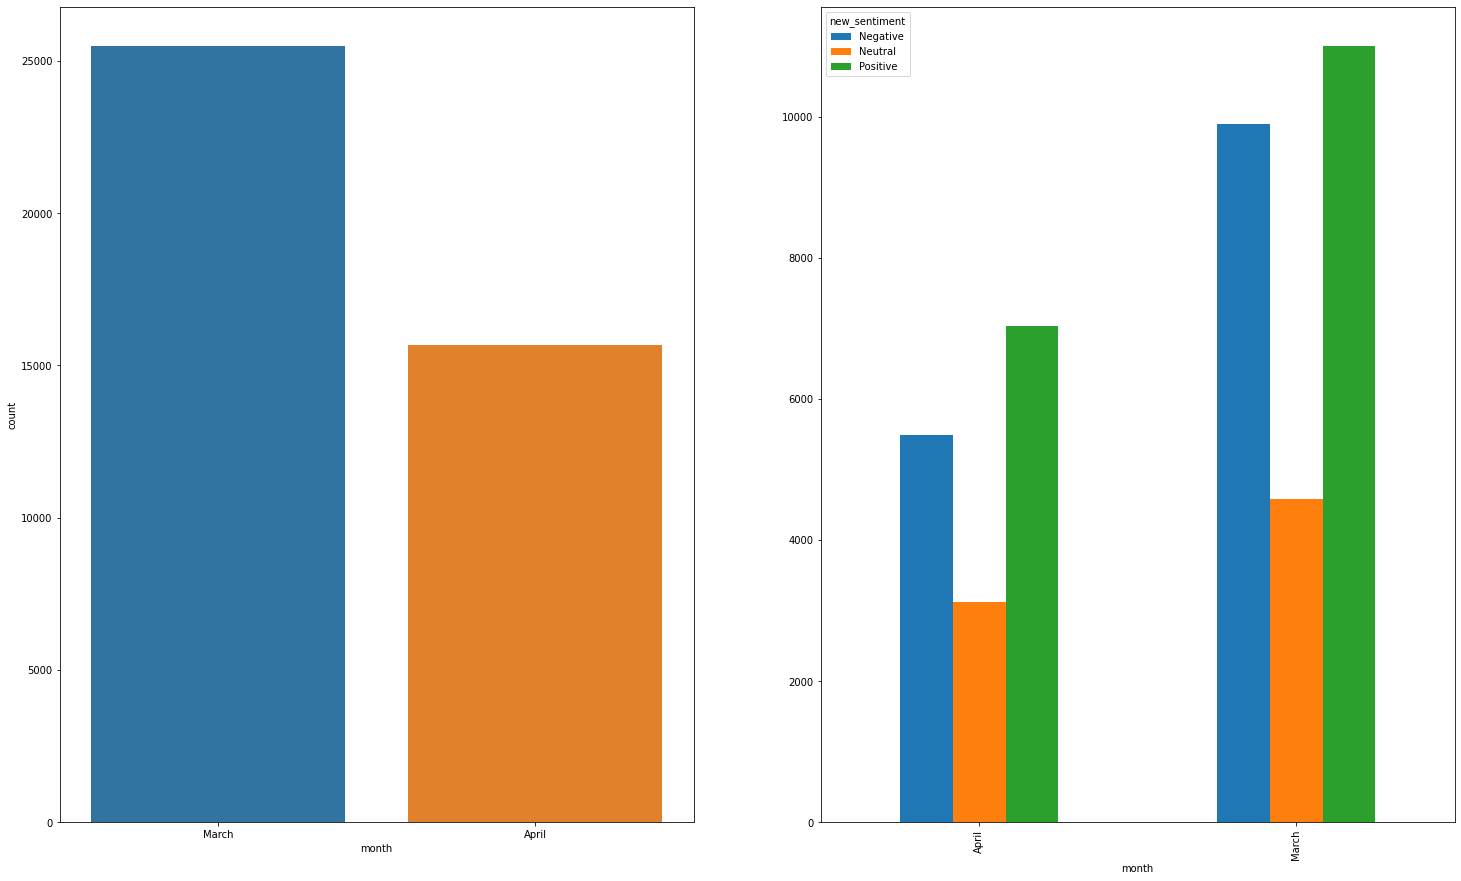

In [ ]:
# Ploting the count plot:
fig,axis = plt.subplots(1,2,figsize=(25,15))
sns.countplot(data=df,x=df['month'],ax=axis[0])
df.groupby(['month','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',ax=axis[1])

new_sentiment  month  Negative  Neutral  Positive  neg_ratio
0              April      5493     3127      7038       0.35
1              March      9905     4586     11008       0.39


<Axes: xlabel='month', ylabel='neg_ratio'>

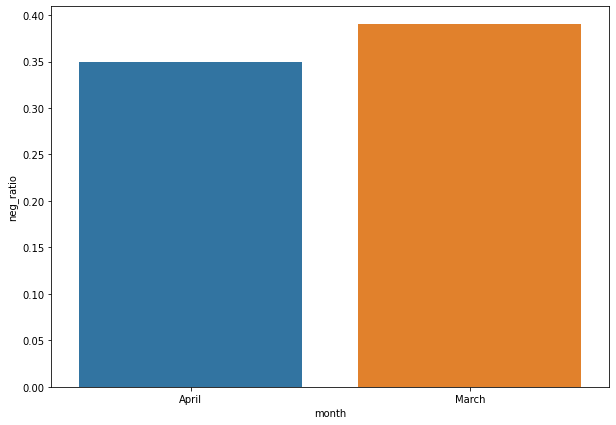

In [ ]:
# Ploting the graph for negative tweets to total tweets ratio:
month = df.groupby(['month','new_sentiment'])['UserName'].count().unstack().reset_index()
month['neg_ratio'] = (month['Negative']/(month['Negative'] + month['Neutral'] + month['Positive'])).round(2)
print(month)
plt.figure(figsize=(10,7))
sns.barplot(data=month,x='month',y='neg_ratio')

**Conclusion:**


*   As we seen in Date bar plot march is most tweeted month of about 62% of total tweets.
*   March have 64% of Negative of total negative, 60% of neutral of total neutral & 61% of positve of total positive tweets.
*   March and April has ratio of negative tweets to total tweets is 0.39 & 0.35 respectively.






## Realtion Between Location,Tweets & Sentiments:




In [ ]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

**There are huge unique location on data set. Some are repeated in different format, some are null values, some are unknown string. So we have to arrange the location column data in proper format. So I'm going to use geocoders to segregate the location according to country name.**

In [ ]:
# Function to extract country name :
from geopy.geocoders import Nominatim
def country_name(address):
  try:
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(address)
    return location[0].split(',')[-1]
  except:
    return np.nan


In [ ]:
groupby_loc = df.groupby(['Location'])['UserName'].count().reset_index().sort_values('UserName', ascending=False).rename(columns={'UserName':'total_count'})

In [ ]:
groupby_loc['country'] = groupby_loc['Location'].apply(country_name)

In [ ]:
# Total Unique countries:
len(groupby_loc['country'].unique())

298

**There are 298 country's data in this Dataset. It is impossible to look at each country.So we do EDA for some top 20 countries**

In [ ]:
# Grouping the data according to total tweet counts:
new_grouped_df = groupby_loc.groupby(['country']).agg({'total_count': 'sum'}).reset_index().sort_values('total_count', ascending=False)

In [ ]:
# Seprating the top twenty countries:
top_twenty = new_grouped_df.head(20)

In [ ]:
top_twenty['country'] = top_twenty['country'].apply(country_name)

<ipython-input-52-465e7acb9aa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_twenty['country'] = top_twenty['country'].apply(country_name)


In [ ]:
top_twenty.groupby(['country'])['total_count'].sum().reset_index().sort_values('total_count', ascending=False)

,country,total_count
12,United States,12761
11,United Kingdom,5567
1,Canada,1850
4,India,1564
0,Australia,1095
8,Nigeria,295
10,South Africa,282
13,Éire / Ireland,195
2,Deutschland,185
6,Kenya,171


<Axes: xlabel='country'>

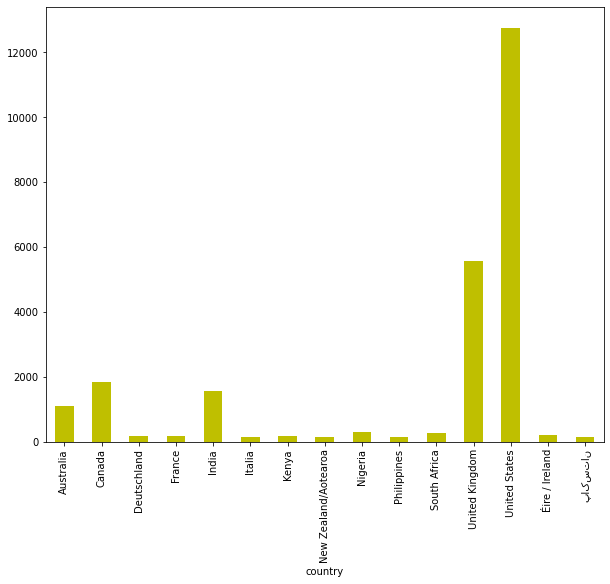

In [ ]:
# Plotting the graph:
top_twenty.groupby(['country'])['total_count'].sum().plot(kind='bar',color='y',figsize=(10,8))



*   United states is the top scorer.United kindom is in 2nd position.
*   India lies at 4th position.



## Preparing the Data,Pre Text processing:

In [ ]:
# Keep the Dataset which only have positive and neutral Sentiments:
final_df = df[df['new_sentiment'] != 'Neutral']

In [ ]:
# Encoding the dependent variable as 0 & 1:
final_df['new_sentiment'] = final_df['new_sentiment'].apply(lambda z: 1 if z=='Positive' else 0)

<ipython-input-56-d20314a81913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['new_sentiment'] = final_df['new_sentiment'].apply(lambda z: 1 if z=='Positive' else 0)


In [ ]:
# Importing Stop words and strings:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove stopwords and strings:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
final_df['OriginalTweet'] = final_df['OriginalTweet'].apply(text_process)

<ipython-input-59-8b400045304e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['OriginalTweet'] = final_df['OriginalTweet'].apply(text_process)


In [ ]:
final_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length,new_sentiment,week,month
1,3800,48752,UK,2020-03-16,advice Talk neighbours family exchange phone n...,Positive,237,1,Monday,March
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia Woolworths give elderly ...,Positive,131,1,Monday,March
3,3802,48754,NaN,2020-03-16,food stock one empty PLEASE dont panic ENOUGH ...,Positive,306,1,Monday,March
4,3803,48755,NaN,2020-03-16,ready go supermarket COVID19 outbreak Im paran...,Extremely Negative,310,0,Monday,March
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,news regionÂs first confirmed COVID19 case ca...,Positive,250,1,Monday,March


## **Feature Engineering 1: CountVectorization**



**CountVectorizer is a widely-used technique in natural language processing (NLP) for text preprocessing and feature extraction. It is a class in the scikit-learn library in Python that allows users to convert a collection of text documents into a matrix of token counts. CountVectorizer works by taking a set of text documents and breaking them down into individual words or tokens, and then counting the occurrence of each token in each document. This count information is then converted into a matrix format where each row represents a document and each column represents a token. The resulting matrix can be used as input to machine learning models for tasks such as sentiment analysis, text classification, and topic modeling.**

In [ ]:
# Creating Variable for count Vectorizor & apply fit_transform on tweet text:
vectorizor_count = CountVectorizer(max_df = 0.9,min_df = 10)
X=vectorizor_count.fit_transform(final_df['OriginalTweet'])

In [ ]:
len(X.toarray()[1252])

6143

**There are total 6143 number of columns after vectorization**

In [ ]:
# Splitting data into test and Train:
x_train,x_test,y_train,y_test = train_test_split(X,final_df['new_sentiment'],test_size=0.3,stratify=final_df['new_sentiment'],random_state=42)

In [ ]:
y_test.value_counts()

1    5414
0    4620
Name: new_sentiment, dtype: int64

In [ ]:
5414/(5414+4620)

0.5395654773769185

In [ ]:
y_train.value_counts()

1    12632
0    10778
Name: new_sentiment, dtype: int64

In [ ]:
12632/(12632+10778)

0.5395984621956429

**Data is Stratified and balanced**

## **Model Implementation**: *Multinomial Naive Bayes.*
**Multinomial Naive Bayes is a popular classification algorithm commonly used in natural language processing (NLP) and text analysis. It is based on the Bayes theorem and assumes that the features in a dataset are independent of each other.**

**In Multinomial Naive Bayes, the input data is represented as a bag-of-words model, where each feature is the count of a particular word or token in a given document. The algorithm then estimates the probability of each class given the feature values using Bayes theorem. Specifically, it calculates the probability of each class given the feature values as the product of the probabilities of each feature given the class.**



In [ ]:
# Applying Multinomial Naive Bayes on grid search by using parameter alpha and fit_prior, using 5 crossvalidation:
mnb = MultinomialNB()
param_grid_1 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],'fit_prior': [True, False]}
grid_search_1 = GridSearchCV(mnb, param_grid_1, scoring='roc_auc', cv=5)

**Parameters used in param_grid_1:**


1. **alpha**: This parameter is used to control the smoothing of the probabilities. Smoothing is used to prevent zero probabilities when a feature is not present in the training set. The default value of alpha is 1.0, which provides a moderate amount of smoothing. A lower value of alpha results in less smoothing, while a higher value results in more smoothing
2.   **fit_prior**: This parameter is a boolean value that determines whether to learn the class prior probabilities from the training data or to use a uniform prior. The default value of fit_prior is True, which means that the prior probabilities are learned from the training data.



In [ ]:
# Training the model:
grid_search_1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
# Best Parameters:
print(grid_search_1.best_params_)

{'alpha': 2.0, 'fit_prior': True}


In [ ]:
# Predicting the test values:
y_test_pred_1 = grid_search_1.predict(x_test)

In [ ]:
# Calculating the confusion Matrix:
confusion_matrix(y_test_pred_1,y_test)

array([[3549, 1009],
       [1071, 4405]])

In [ ]:
# Classification Report:
print(classification_report(y_test,y_test_pred_1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      4620
           1       0.80      0.81      0.81      5414

    accuracy                           0.79     10034
   macro avg       0.79      0.79      0.79     10034
weighted avg       0.79      0.79      0.79     10034



In [ ]:
roc_score_1 = roc_auc_score(y_test, grid_search_1.predict_proba(x_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_1.round(2))

ROC AUC score: 0.87


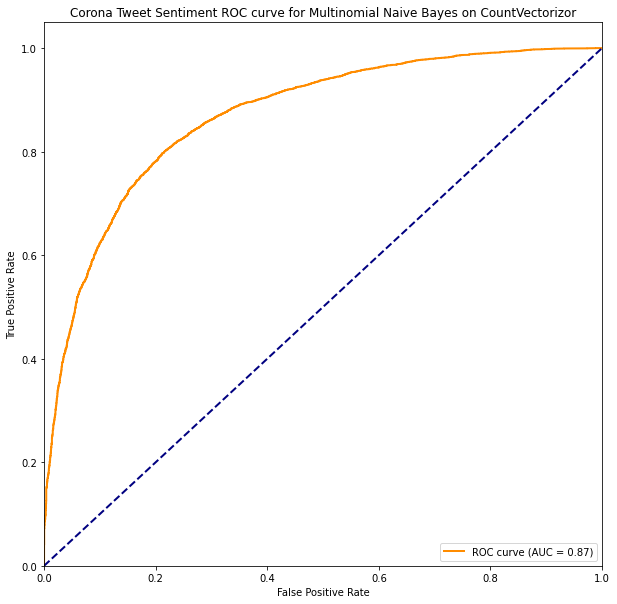

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,grid_search_1.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Corona Tweet Sentiment ROC curve for Multinomial Naive Bayes on CountVectorizor')
plt.legend(loc="lower right")
plt.show()

## **Model Implementation**: *Logistic Regression.*
**Logistic regression is a statistical method used to analyze relationships between a categorical dependent variable and one or more independent variables. It is commonly used in binary classification problems, where the goal is to predict whether an outcome belongs to one of two possible classes. The logistic regression model uses a sigmoid function to transform the input data and outputs a probability value between 0 and 1. The sigmoid function allows the model to map any input value to a probability value, which can be interpreted as the likelihood of belonging to one of the classes. The logistic regression algorithm estimates the parameters of the model using maximum likelihood estimation, which seeks to find the parameters that maximize the likelihood of the observed data given the model. The resulting model can be used to make predictions on new data by using the estimated parameters to calculate the probability of belonging to each class and selecting the class with the highest probability.**

In [ ]:
# Applying LogisticRegression on grid search by using parameter C and penalty, using 5 crossvalidation
log_reg = LogisticRegression()
param_grid_2 = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_2 = GridSearchCV(log_reg, param_grid=param_grid_2, scoring='roc_auc', cv=5)

**Parameters used in param_grid_1:**

1.   **C**: This parameter controls the regularization strength, with smaller values indicating stronger regularization. The default value is 1.0.
2.   **penalty**: This parameter specifies the type of regularization to use. It can take on the values 'l1', 'l2', 'elasticnet', or 'none'. The default value is 'l2'.
3.   **solver**: This parameter specifies the optimization algorithm to use. It can take on the values 'newton-cg', 'lbfgs', 'liblinear', 'sag', or 'saga'. The default value is 'lbfgs'.








In [ ]:
# Training the model:
grid_search_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
print(grid_search_2.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
y_test_pred_2 = grid_search_2.predict(x_test)

In [ ]:
print(classification_report(y_test,y_test_pred_2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4620
           1       0.88      0.89      0.89      5414

    accuracy                           0.88     10034
   macro avg       0.88      0.87      0.88     10034
weighted avg       0.88      0.88      0.88     10034



In [ ]:
confusion_matrix(y_test_pred_2,y_test)

array([[3966,  588],
       [ 654, 4826]])

In [ ]:
roc_score_2 = roc_auc_score(y_test, grid_search_2.predict_proba(x_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_2.round(2))

ROC AUC score: 0.94


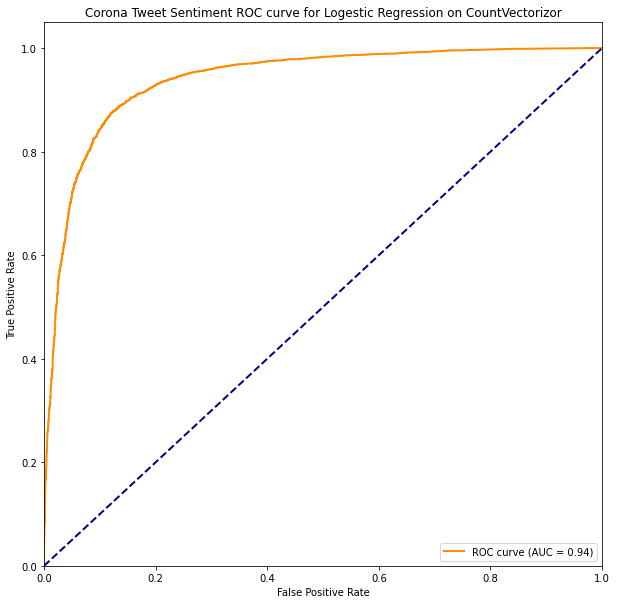

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,  grid_search_2.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Corona Tweet Sentiment ROC curve for Logestic Regression on CountVectorizor')
plt.legend(loc="lower right")
plt.show()

**From the above two algorithm we conclude that:**

1.   Logestic Regression, a Discriminative algorithm shows better result than  Naive Bayes , Generative algorithm.
2.   Logistic regression shows better result in every aspects of metric calculation eg. Accurracy, Precision, Recall etc.
3.  For our primaray metrics AUC score Naive bayes shows score about 87 percent, on otherhand 94 percent is given by Logistic Regression.
4.  Logistic Regression shows better results on CountVectorizor.









**As Previously calculated Logestic Regression Win the war in CountVectorizor FEA. Now its time to see what TF-IDF FEA would give.**

## **Feature Engineering 2: Term Frequency-Inverse Document Frequency**

**TF-IDF is a statistical method used in natural language processing to quantify the importance of a word in a document or corpus. It is calculated by multiplying the frequency of a word in a document by the inverse frequency of the word in the entire corpus. The resulting TF-IDF score is used to weight the importance of words in text data for vectorization and machine learning algorithms. The higher the TF-IDF score of a word, the more important it is in the document or corpus. The scikit-learn library in Python provides a TfidfVectorizer class that can be used to compute the TF-IDF representation of a corpus of text documents.**

In [ ]:
# Creating Variable for count Vectorizor & apply fit_transform on tweet text:
vectorizer_tv = TfidfVectorizer(max_df = 0.9,min_df = 10)
x = vectorizer_tv.fit_transform(final_df['OriginalTweet'])

In [ ]:
len(x.toarray()[1257])

6143

In [ ]:
# Again Splitting the Data:
X_train,X_test,Y_train,Y_test = train_test_split(x,final_df['new_sentiment'],test_size=0.3,stratify=final_df['new_sentiment'],random_state=42)

In [ ]:
Y_test.value_counts()

1    5414
0    4620
Name: new_sentiment, dtype: int64

In [ ]:
# Again train the model using grid search, same as earlier:
mnb = MultinomialNB()
param_grid_3 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],'fit_prior': [True, False]}
grid_search_3 = GridSearchCV(mnb, param_grid_3, scoring='roc_auc', cv=5)

In [ ]:
# Fitting or train the data:
grid_search_3.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
# Best Estimators:
print(grid_search_3.best_params_)

{'alpha': 2.0, 'fit_prior': True}


In [ ]:
# Test Prediction
y_test_pred_3 = grid_search_3.predict(X_test)

In [ ]:
# Confusion Matrix:
confusion_matrix(y_test_pred_3,Y_test)

array([[3214,  699],
       [1406, 4715]])

In [ ]:
# Classification report:
print(classification_report(Y_test,y_test_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      4620
           1       0.77      0.87      0.82      5414

    accuracy                           0.79     10034
   macro avg       0.80      0.78      0.79     10034
weighted avg       0.79      0.79      0.79     10034



In [ ]:
roc_score_3 = roc_auc_score(Y_test, grid_search_3.predict_proba(X_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_3.round(2))

ROC AUC score: 0.88


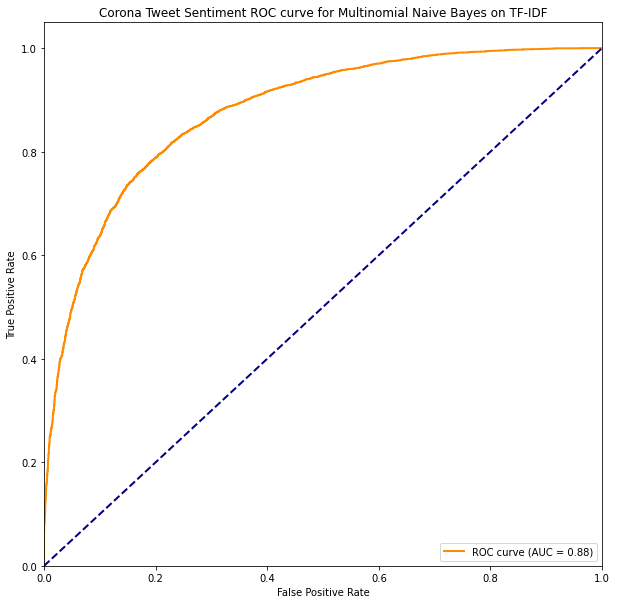

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test,grid_search_3.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Corona Tweet Sentiment ROC curve for Multinomial Naive Bayes on TF-IDF')
plt.legend(loc="lower right")
plt.show()

## **Model Implementation**: *Logistic Regression.*

In [ ]:
log_reg = LogisticRegression()
param_grid_4 = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_4 = GridSearchCV(log_reg, param_grid=param_grid_4, scoring='roc_auc', cv=5)

In [ ]:
grid_search_4.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
print(grid_search_4.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
y_test_pred_4 = grid_search_4.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_test_pred_4))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4620
           1       0.87      0.88      0.87      5414

    accuracy                           0.86     10034
   macro avg       0.86      0.86      0.86     10034
weighted avg       0.86      0.86      0.86     10034



In [ ]:
confusion_matrix(y_test_pred_4,Y_test)

array([[3924,  663],
       [ 696, 4751]])

In [ ]:
roc_score_4 = roc_auc_score(Y_test, grid_search_4.predict_proba(X_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_4.round(2))

ROC AUC score: 0.93


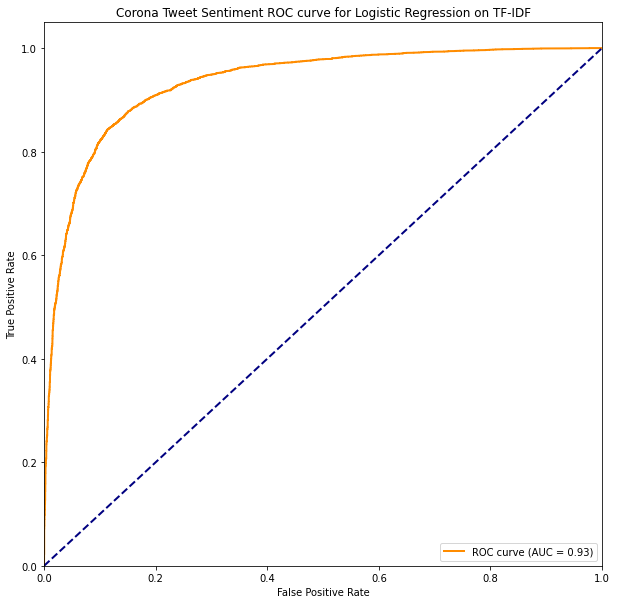

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, grid_search_4.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Corona Tweet Sentiment ROC curve for Logistic Regression on TF-IDF')
plt.legend(loc="lower right")
plt.show()

**From the above two algorithm we conclude that:**

1.   Again Logistic regression shows better result in every aspects of metric calculation eg. Accurracy, Precision, Recall etc.
2.  For our primaray metrics, AUC score Naive bayes shows score about 88 percent, on otherhand 93 percent is given by Logistic Regression.
3.  Again Logistic Regression shows better results on TF-IDF vectorizor.


##**Final Conclusion:**

1.   In both the vectorizor meathod Logistc regression shows best results on this dataset.
2.   The highest AUC ROC score acheive by the algorithm is 94 percent, which is given by Logistic on CountVectorizor meathod.
3.   In terms of accurracy, Logistic on CountVectorizor meathod shows 88 percent of accurracy.
4.   This shows Logistic Regression Model perform better in CountVectorizor.
5.   On other hand Multinomial naive bayes shows better results in TF-IDF Vectorizor.
6.   However variation of results in both vectorizor meathod is not that large i.e only 1-2 % variation. Can be use either of them on Logistic Regression.









